In [46]:
import numpy as np
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
from matplotlib.patches import CirclePolygon


poly = Polygon([(-2.5,5.9),(6,3.5),(9,-3),(6,-5.9),(-7.5,-3.7)])  #Poligono externo

minx, miny, maxx, maxy = poly.bounds 

pontos =[]
# lista_x = []
# lista_y = []
# lista_candidatos_x = []
# lista_candidatos_y = []
cont= 500
i=0
while i < cont:
    check=True
    while check:
        x = None
        y = None
        x = random.uniform(minx,maxx)
        y = random.uniform(miny,maxy)
        coords = np.array([(x,y)])
#       print(coords)
        points = Point(coords[0])#[Point(xy) for xy in coords]
#         print(points.within(poly))
        """
        verificar se esta dentro do poligono
        """
        check = False if points.within(poly) else True
    pontos.append([x,y])
    """
    Verifico se o ultimo ponto criado respeita a dist. euclidiana
    """
    if len(pontos)>1:
        ult_pont = pontos[-1]
        flag = True
        for i in range(len(pontos)-1):
            
            flag = flag and (distance.euclidean(pontos[i],ult_pont)>0.39) and (ult_pont != pontos[i])
            if not flag: break
        if flag == True:
            i=i+1
        else:
            pontos.remove(ult_pont)
    else:
        i=i+1
"""
Matriz referente as distâncias euclidianas
"""
# mat =np.zeros((len(pontos),len(pontos)))

# for l in range(len(pontos)):
#     for c in range(len(pontos)):
#         if l<c:
#             mat[l,c] = distance.euclidean(pontos[l],pontos[c])
#             mat[c,l] = mat[l,c]

            
            
#for i in range(len(pontos)):
#    print(pontos[i])
# print("\n")
# print(mat<0.8)
# print(pontos[-1])

'\nMatriz referente as distâncias euclidianas\n'

### Pontos criados dentro do poligono respeitando a distância euclidiana proposta

In [47]:
#pontos = np.array(pontos)
for i in range(len(pontos)):
    print(pontos[i])

[-2.288877009648407, -1.0620377262715195]
[-4.412573547759099, -1.3030667062731123]
[3.046606940377302, 2.8226028790051725]
[7.759753837428889, -1.5635402120399995]
[5.9209101343329404, -1.1805378973361256]
[-2.8295072283206846, 4.647311535398908]
[-3.204030741068177, -1.1210213877212913]
[0.8391082805901, -0.3600049231593925]
[0.32916312143645765, 0.6657168193861098]
[-1.0530185581279223, -1.3693442722765665]
[-3.4466889709316915, 1.0264718303601912]
[4.582654650672708, -2.0922705872150718]
[-4.03762534362654, -0.3418564606141272]
[5.443252383845678, -5.719308634431613]
[4.340521047718722, 1.8010735294427214]
[-1.8770453458985816, -3.7915894418368894]
[4.1301605251146665, 2.870877877021009]
[-6.274461296397298, -1.53392759238114]
[5.275213407944344, 3.173220615486313]
[2.5719441700405756, -5.272493577730958]
[7.102570844202356, -3.140350638481583]
[-4.186104718698881, 2.608786747798524]
[-0.6477148601416962, -3.9144937994243567]
[-5.187728762537283, -0.5279688066391364]
[-0.2363915950

### Plot dos pontos dentro do poligono

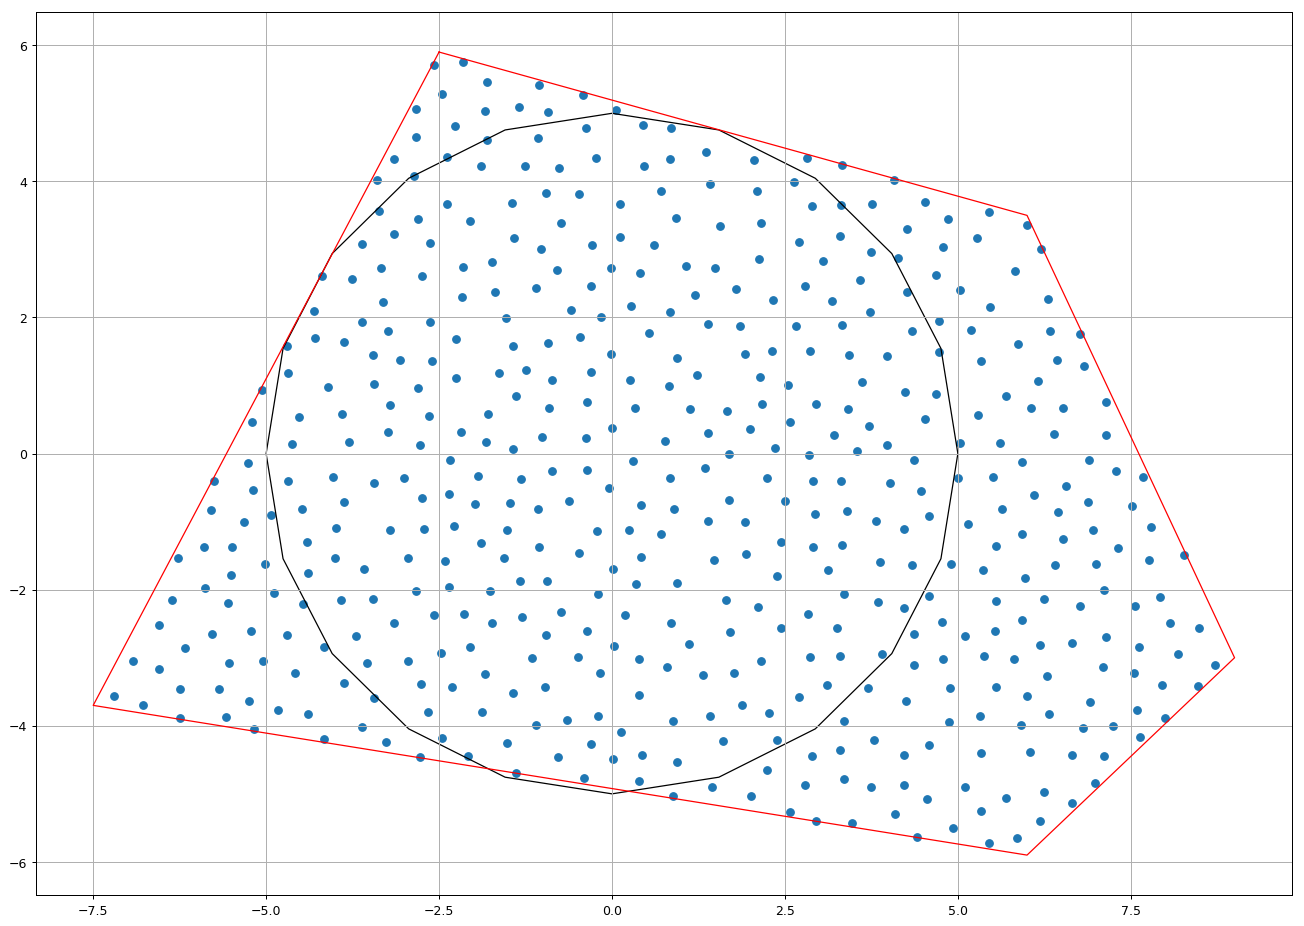

In [48]:
pontos = np.array(pontos)

x,y = poly.exterior.xy

fig = plt.figure(1, figsize=(18,13), dpi=90)
plt.scatter(pontos[:,0],pontos[:,1])
plt.plot(x, y, color='red',linewidth=1, scalex=True, scaley=True)
circle = CirclePolygon((0, 0), radius = 5, fill=False)
plt.gca().add_patch(circle)
plt.grid(True)
plt.show()



### Média dos pontos criados

In [58]:
pontos = np.array(pontos)
media = np.mean(pontos, axis=0)
media

array([ 1.01902944, -0.547866  ])

### Mediana dos pontos criados

In [59]:
mediana = np.median(pontos, axis=0)
mediana

array([ 0.87492147, -0.81185121])

### Centro de massa do poligono

In [60]:
centro_geo = [1, -0.5]

### Ponto mais profundo (calculado no C)

In [61]:
maisprof = pontos[[7]]
maisprof

array([[ 0.83910828, -0.36000492]])

### X% dos pontos mais profundos

In [62]:
prof_5 = pontos[[7,
363,
352,
48,
411
]]
prof_5


array([[ 0.83910828, -0.36000492],
       [ 0.89046277, -0.81796865],
       [ 1.34422294, -0.2127088 ],
       [ 0.4247876 , -0.75579814],
       [ 0.76629768,  0.18657047]])

### Média dos pontos X% mais profundos

In [63]:
med_prof_5 = np.mean(prof_5, axis=0)

### Mediana de Tukey (calculado no R)

In [64]:
tukey = [1.0611226, -0.5382402]

In [65]:
svm = [0,0]

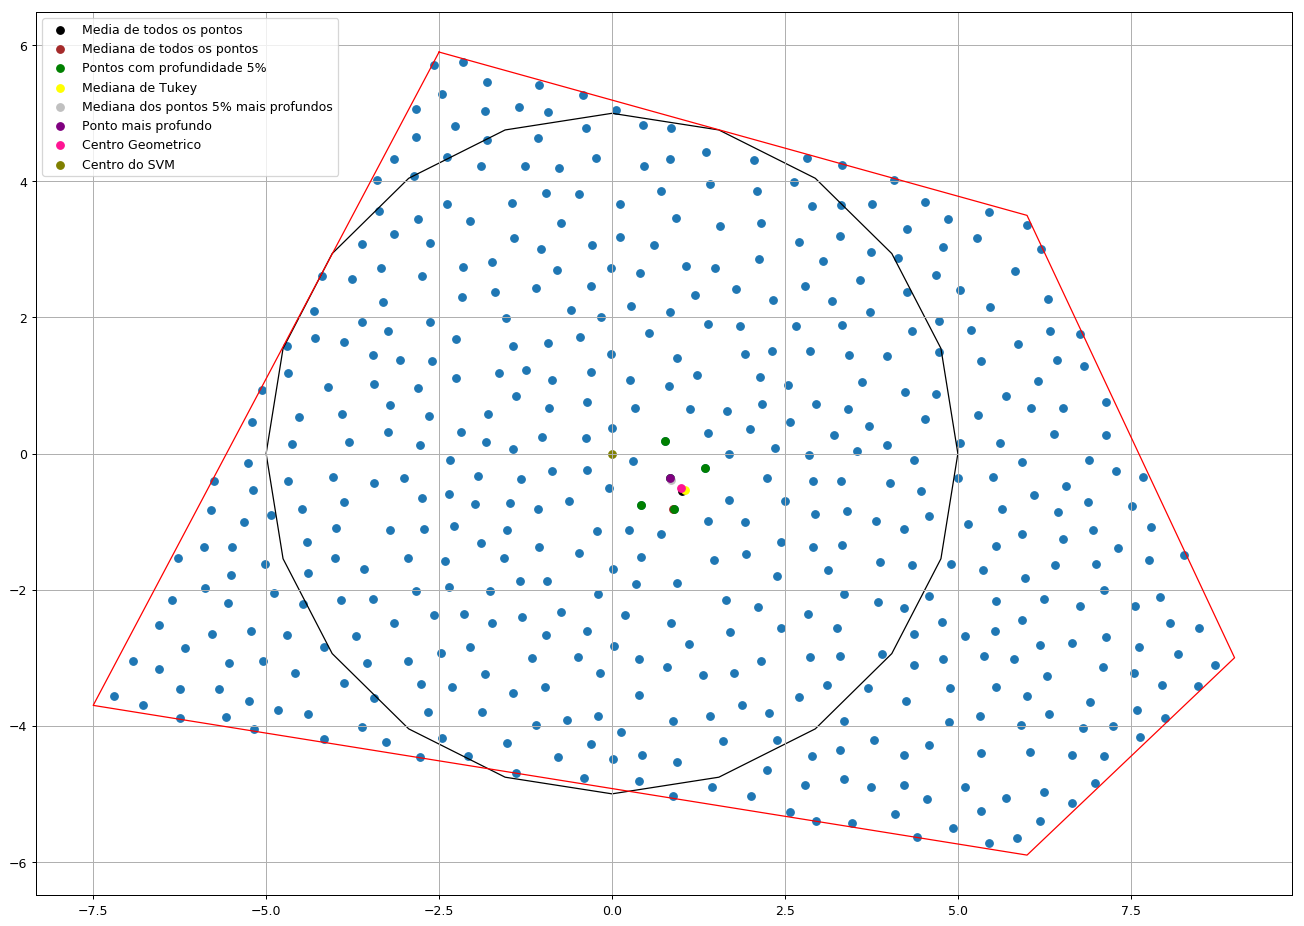

In [67]:
circle = CirclePolygon((0, 0), radius = 5, fill=False)

pontos = np.array(pontos)

x,y = poly.exterior.xy

fig = plt.figure(1, figsize=(18,13), dpi=90)
plt.scatter(pontos[:,0],pontos[:,1])
plt.scatter(media[0], media[1], c='black', label='Media de todos os pontos')
plt.scatter(mediana[0], mediana[1], c='brown', label='Mediana de todos os pontos')
plt.scatter(prof_5[:,0], prof_5[:,1], c='green', label='Pontos com profundidade 5%')
plt.scatter(tukey[0], tukey[1], c='yellow', label='Mediana de Tukey')
plt.scatter(med_prof_5[0], med_prof_5[1], c='silver', label='Mediana dos pontos 5% mais profundos')
plt.scatter(maisprof[:,0], maisprof[:,1], c='purple', label='Ponto mais profundo')
plt.scatter(centro_geo[0],centro_geo[1], c='deeppink', label='Centro de massa')
plt.scatter(svm[0],svm[1], c='olive', label='Centro do SVM')
plt.plot(x, y, color='red',linewidth=1, scalex=True, scaley=True)
plt.gca().add_patch(circle)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()